# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

C:\Users\csas1756\Documents\GitHub\picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

In [3]:
RUN = pica.FullRun('example_data/HKDS2009_IsoWater_20191119_101154.csv')

Running the corrections for Oxygen 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type
Checking: NA-19-26 ...
Standard dev is good
10493.0
Checking: NA-19-25 ...
Standard dev is good
10492.0
Checking: NA-19-30 ...
Standard dev is good
10497.0
Checking: NA-19-29 ...
Standard dev is good
10496.0
Checking: NA-19-14 ...
Standard dev too high get rid of measurement 1
10479.0
Checking: NA-19-16 ...
Standard dev is good
10482.0
Checking: NA-19-15 ...
Standard dev too high get rid of measurement 1
10481.0
Checking: NA-19-21 ...
Standard dev is good
10487.0
Checking: NA-19-28 ...
Standard dev is good
10495.0
Checking: NA-19-24 ...
Standard dev is good
10491.0
10472.0
10475.0
Checking: NA-19-20 ...
Standard dev is good
10486.0
Checking: NA-19-17 ...
Standard dev too high get rid of measurement 1
1048

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



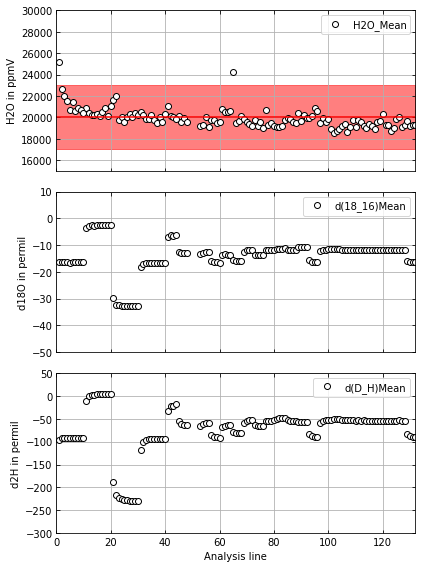

In [4]:
RUN.O18.plotSummary()

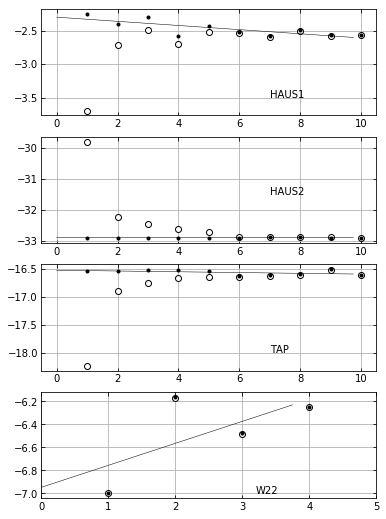

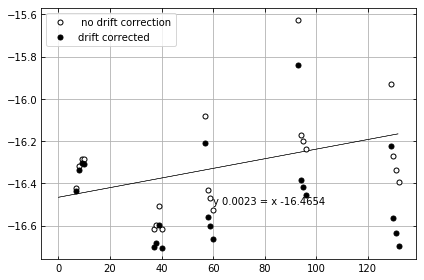

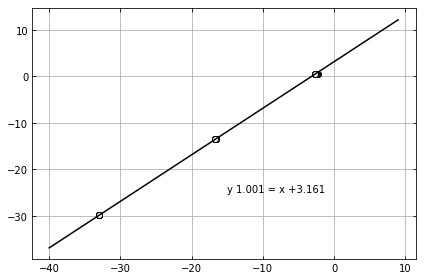

In [5]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

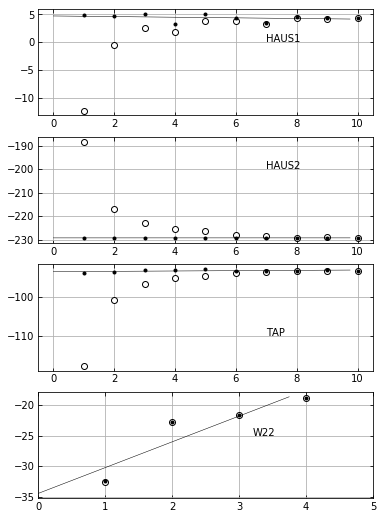

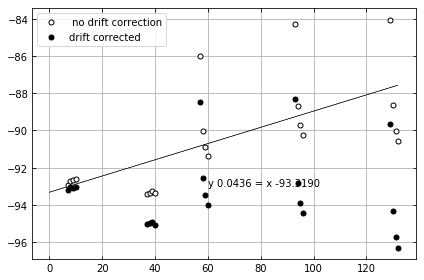

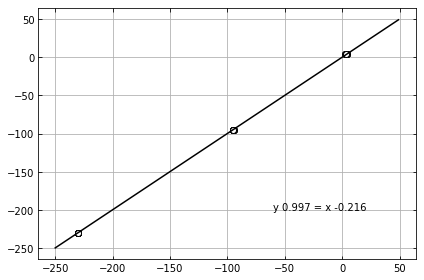

In [6]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

In [7]:
RUN.O18.corr

key   Line  d(18_16)Mean  Ignore  \
Identifier 1 Identifier 2 Inj Nr                                         
TAP          Conditioning 7       10472.0    7.0       -16.422     0.0   
                          8       10472.0    8.0       -16.316     0.0   
                          9       10472.0    9.0       -16.285     0.0   
                          10      10472.0   10.0       -16.283     0.0   
HAUS1        Standard     1       10473.0   11.0        -3.692    -1.0   
...                                   ...    ...           ...     ...   
NA-19-30     YD           4       10497.0  128.0       -11.870     0.0   
TAP          Control      1       10498.0  129.0       -15.929    -1.0   
                          2       10498.0  130.0       -16.268    -1.0   
                          3       10498.0  131.0       -16.335    -1.0   
                          4       10498.0  132.0       -16.394     0.0   

                                  Error Code        RUN_ID    coeffs  \
Identifier 1 Identifier 2 Inj Nr                                       
TAP          Conditioning 7              0.0  2.019102e+13  1.000000   
                          8              0.0  2.019102e+13  1.000000   
                          9              0.0  2.019102e+13  1.000000   
                          10             0.0  2.019102e+13  1.000000   
HAUS1        Standard     1              0.0  2.019102e+13  0.885501   
...                                      ...           ...       ...   
NA-19-30     YD           4              0.0  2.019102e+13  1.000000   
TAP          Control      1              0.0  2.019102e+13  0.999135   
                          2              0.0  2.019102e+13  0.999135   
                          3              0.0  2.019102e+13  0.999215   
                          4              0.0  2.019102e+13  1.000000   

                                  previous  d(18_16)mem_corrected  
Identifier 1 Identifier 2 Inj Nr                                   
TAP          Conditioning 7            7.0             -16.422000  
                          8            8.0             -16.316000  
                          9            9.0             -16.285000  
                          10          10.0             -16.283000  
HAUS1        Standard     1           10.0              -2.250347  
...                                    ...                    ...  
NA-19-30     YD           4          124.0             -11.870000  
TAP          Control      1          128.0             -15.928598  
                          2          128.0             -16.267891  
                          3          128.0             -16.334954  
                          4          128.0             -16.394000  

[122 rows x 9 columns]

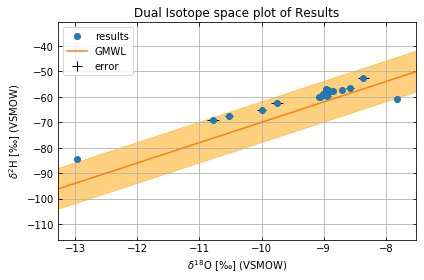

In [8]:
pica.OverviewPlot(RUN)

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [9]:
RUN.coeffs["H"]

1     0.787325
2     0.944664
3     0.972826
4     0.983355
5     0.987323
6     0.995082
7     0.997157
8     0.999038
9     0.999038
10    1.000000
Name: H, dtype: float64

In [10]:
RUN.suggestedReruns()

Checking for triplicates...
Some samples were not triplicated
key
10477.0    NA-19-12
10490.0    NA-19-23
10479.0    NA-19-14
Name: Identifier 1, dtype: object


Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
key
10473.0    HAUS1
10476.0      W22
10480.0      TAP
10489.0      TAP
10498.0      TAP
Name: Identifier 1, dtype: object


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
key
10473.0       HAUS1
10476.0         W22
10482.0    NA-19-16
10488.0    NA-19-22
Name: Identifier 1, dtype: object




In [11]:
RUN.trimmed

,Identifier 1,Identifier 2,RUN_ID,position,d18O vsmow,d18O stdev. vsmow,d18O counts,d2H vsmow,d2H stdev. vsmow,d2H counts
key,,,,,,,,,,
10477.0,NA-19-12,YD,2.019102e+13,6.0,-9.996046,0.072200,2,-65.155263,0.133243,2
10479.0,NA-19-14,YD,2.019102e+13,8.0,-9.749127,0.096728,3,-62.504407,0.348994,2
10481.0,NA-19-15,YD,2.019102e+13,10.0,-10.523431,0.059029,3,-67.591950,0.660562,3
10482.0,NA-19-16,YD,2.019102e+13,11.0,-12.966208,0.051278,3,-84.507237,0.451255,3
10483.0,NA-19-17,YD,2.019102e+13,12.0,-8.970300,0.016932,3,-57.085150,0.512950,3
10484.0,NA-19-18,YD,2.019102e+13,13.0,-10.774623,0.094851,4,-69.069484,0.600586,3
10485.0,NA-19-19,YD,2.019102e+13,14.0,-8.931178,0.080095,4,-57.448574,0.575450,3
10486.0,NA-19-20,YD,2.019102e+13,15.0,-8.360699,0.084252,4,-52.735777,0.338528,4
10487.0,NA-19-21,YD,2.019102e+13,16.0,-8.853719,0.026155,4,-57.652183,0.548258,4
